## Wine Origin Country Classification

Italy and France are historically among the countries that produce the most prestigious wines worldwide. This dataset characterizes the Protected Designation of Origin(PDO) label wines produced in Italy and France at very high detail based on the official EU documents. In this project, I build a logistic regression model and a Random Forest model to predict the country of wine origin (IT/FR) based on features of the wine like colour, type and maximum allowed yields. I also perform clustering on the data in an attempt to predict the country of wine origin.

### Importing Libraries

In [338]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

### Get the data

In [339]:
#Reading data
wine_data = pd.read_csv('/Users/vinayarao/Documents/Python Projects/Wine Logistic Regression/PDO_wine_data_IT_FR.csv', sep = ';')

In [340]:
wine_data.head()

,Country,PDOid,PDOnam,Registration,WineNam,Color,Category,Main_var,Second_var,Max_yield_hl,Max_yield_kg,Min_density,Info
0,IT,PDO-IT-A0880,Abruzzo,2011-12-16 00:00:00,Abruzzo Bianco,White,Wine,Trebbiano Abruzzese B; Trebbiano Toscano B,Barbera Bianca B; Biancame B; Bombino Bianco B...,98,14000,2000,https://ec.europa.eu/info/food-farming-fisheri...
1,IT,PDO-IT-A0880,Abruzzo,2011-12-16 00:00:00,Abruzzo Rosso,Red,Wine,Montepulciano N,Aglianico N; Barbera N; Cabernet Franc N; Cabe...,84,12000,2000,https://ec.europa.eu/info/food-farming-fisheri...
2,IT,PDO-IT-A0880,Abruzzo,2011-12-16 00:00:00,Abruzzo Passito Bianco,White,Wine From Raisined Grapes,Malvasia Bianca Di Candia B; Malvasia Bianca L...,Barbera Bianca B; Biancame B; Bombino Bianco B...,98,14000,2000,https://ec.europa.eu/info/food-farming-fisheri...
3,IT,PDO-IT-A0880,Abruzzo,2011-12-16 00:00:00,Abruzzo Passito Rosso,Red,Wine From Raisined Grapes,Montepulciano N,Aglianico N; Barbera N; Cabernet Franc N; Cabe...,84,12000,2000,https://ec.europa.eu/info/food-farming-fisheri...
4,IT,PDO-IT-A0880,Abruzzo,2011-12-16 00:00:00,Abruzzo Spumante Bianco Charmat,White,Sparkling Wine,Chardonnay B; Cococciola B; Montonico Bianco B...,Barbera Bianca B; Biancame B; Bombino Bianco B...,98,14000,2000,https://ec.europa.eu/info/food-farming-fisheri...


In [341]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5489 entries, 0 to 5488
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       5489 non-null   object
 1   PDOid         5489 non-null   object
 2   PDOnam        5489 non-null   object
 3   Registration  5489 non-null   object
 4   WineNam       5489 non-null   object
 5   Color         5489 non-null   object
 6   Category      5489 non-null   object
 7   Main_var      5489 non-null   object
 8   Second_var    5489 non-null   object
 9   Max_yield_hl  5489 non-null   object
 10  Max_yield_kg  5489 non-null   object
 11  Min_density   5489 non-null   object
 12  Info          5489 non-null   object
dtypes: object(13)
memory usage: 557.6+ KB


### Exploratory Data Analysis

Using Seaborn to explore the data visually.

#### Countplot of Country

<Axes: xlabel='Country', ylabel='count'>

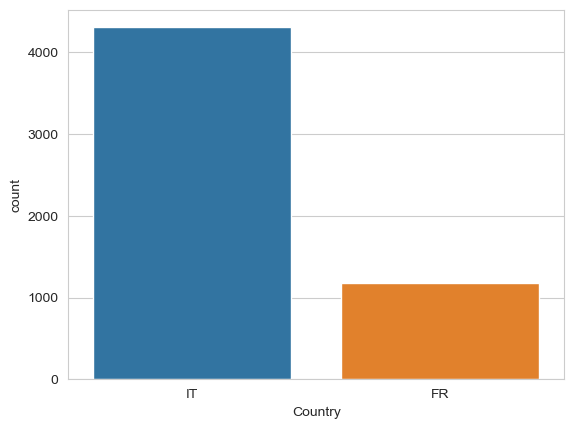

In [342]:
sns.countplot(data = wine_data, x = 'Country')

#### Countplot of Color

<Axes: xlabel='Color', ylabel='count'>

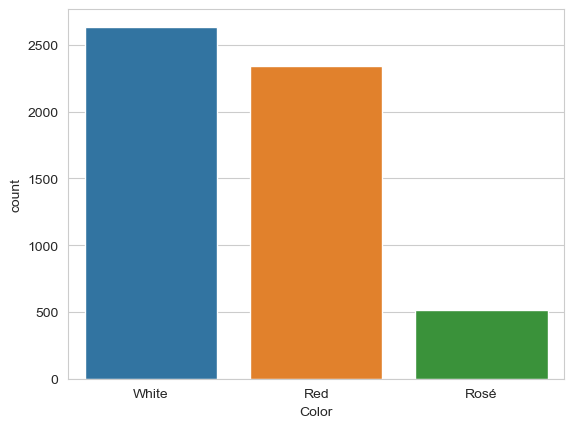

In [343]:
sns.countplot(data = wine_data, x = 'Color')

#### Countplot of Category

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Wine'),
  Text(1, 0, 'Wine From Raisined Grapes'),
  Text(2, 0, 'Sparkling Wine'),
  Text(3, 0, 'Quality Sparkling Wine'),
  Text(4, 0, 'Liqueur Wine'),
  Text(5, 0, 'Semi-Sparkling Wine'),
  Text(6, 0, 'Wine Of Overripe Grapes'),
  Text(7, 0, 'Partially Fermented Grape Must Extracted From Raisined Grapes'),
  Text(8, 0, 'Quality Aromatic Sparkling Wine'),
  Text(9, 0, 'Partially Fermented Grape Must')])

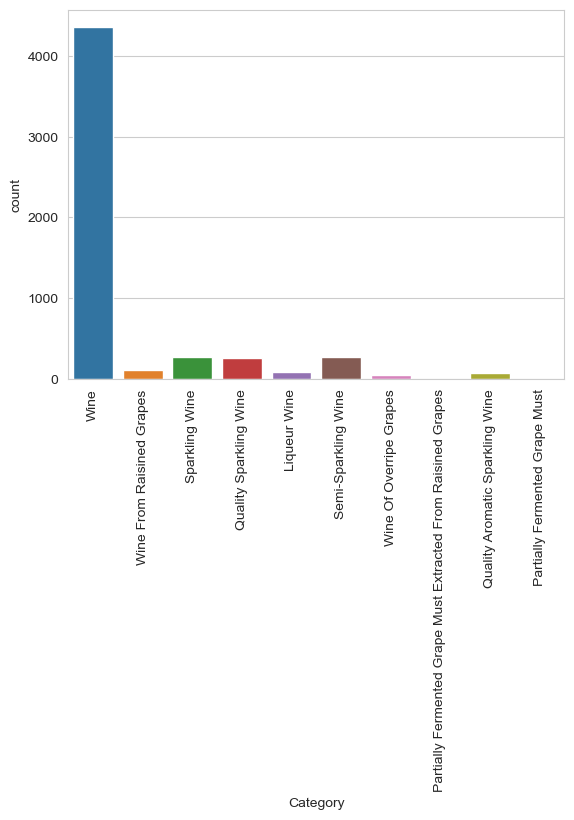

In [344]:
sns.countplot(data = wine_data, x = 'Category')
plt.xticks(rotation=90)

#### Exploring Maximum Yield Fields

In [345]:
wine_data['Max_yield_hl'].value_counts()

Max_yield_hl
na       1437
84        523
70        340
91        297
63        253
         ... 
81          1
44,1        1
62,5        1
56,25       1
8,1         1
Name: count, Length: 118, dtype: int64

#### Replacing Commas with Decimal Points in Max_yield_hl

In [346]:
wine_data['Max_yield_hl'] = wine_data['Max_yield_hl'].str.replace(',', '.')

#### Converting continuous variables to numeric data type

In [347]:
wine_data['Max_yield_kg'] = pd.to_numeric(wine_data['Max_yield_kg'], errors = 'coerce')
wine_data['Min_density'] = pd.to_numeric(wine_data['Min_density'], errors = 'coerce')
wine_data['Max_yield_hl'] = pd.to_numeric(wine_data['Max_yield_hl'], errors = 'coerce')

#### Feature Engineering: Extract year from registration field

In [348]:
wine_data['year'] = pd.DatetimeIndex(wine_data['Registration']).year

In [349]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5489 entries, 0 to 5488
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       5489 non-null   object 
 1   PDOid         5489 non-null   object 
 2   PDOnam        5489 non-null   object 
 3   Registration  5489 non-null   object 
 4   WineNam       5489 non-null   object 
 5   Color         5489 non-null   object 
 6   Category      5489 non-null   object 
 7   Main_var      5489 non-null   object 
 8   Second_var    5489 non-null   object 
 9   Max_yield_hl  4052 non-null   float64
 10  Max_yield_kg  3958 non-null   float64
 11  Min_density   4702 non-null   float64
 12  Info          5489 non-null   object 
 13  year          5489 non-null   int32  
dtypes: float64(3), int32(1), object(10)
memory usage: 579.0+ KB


#### Histogram of Max_yield_kg, Max_yield_hl and Min_density

<Axes: xlabel='Max_yield_kg', ylabel='Count'>

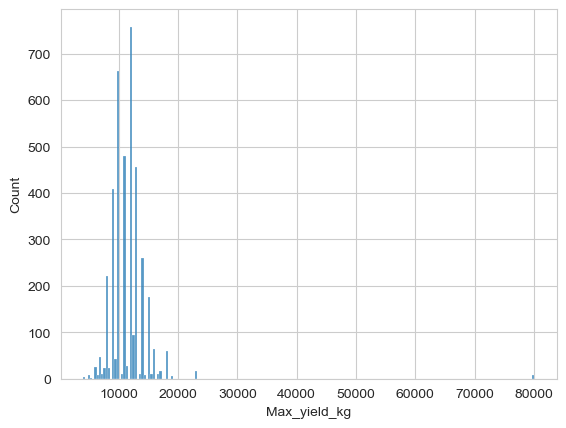

In [350]:
sns.histplot(data = wine_data, x = 'Max_yield_kg')

<Axes: xlabel='Max_yield_hl', ylabel='Count'>

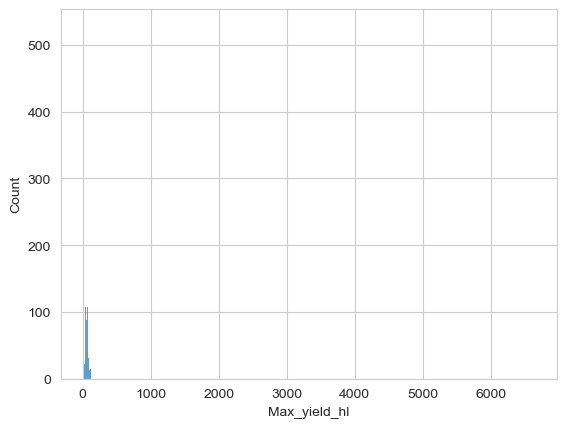

In [351]:
sns.histplot(data = wine_data, x = 'Max_yield_hl')

<Axes: xlabel='Min_density', ylabel='Count'>

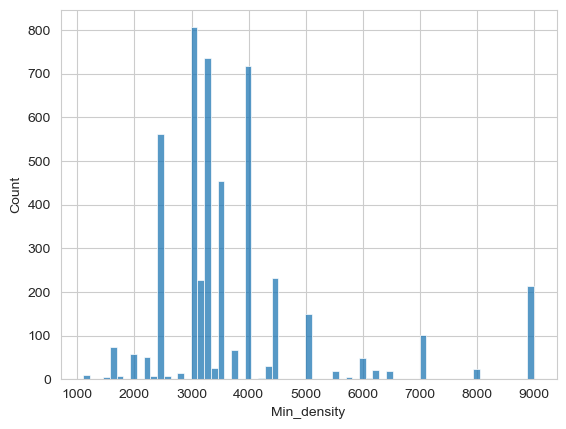

In [352]:
sns.histplot(data = wine_data, x = 'Min_density')

#### Max_yield_hl and Max_yield_kg have a few extreme outliers. Removing them to have clean data.

In [353]:
wine_data[wine_data['Max_yield_hl'] > 1000]['Max_yield_hl'].value_counts()

Max_yield_hl
6635.0    1
Name: count, dtype: int64

In [354]:
wine_data[wine_data['Max_yield_kg'] > 25000]['Max_yield_kg'].value_counts()

Max_yield_kg
80000.0    7
Name: count, dtype: int64

In [355]:
wine_data = wine_data[(wine_data['Max_yield_hl'].isnull()) | (wine_data['Max_yield_hl'] < 1000)]

wine_data = wine_data[(wine_data['Max_yield_kg'].isnull()) | (wine_data['Max_yield_kg'] < 25000)]

#### Boxplot of Max_yield_kg, Max_yield_hl, Min_density by color

<Axes: xlabel='Color', ylabel='Max_yield_kg'>

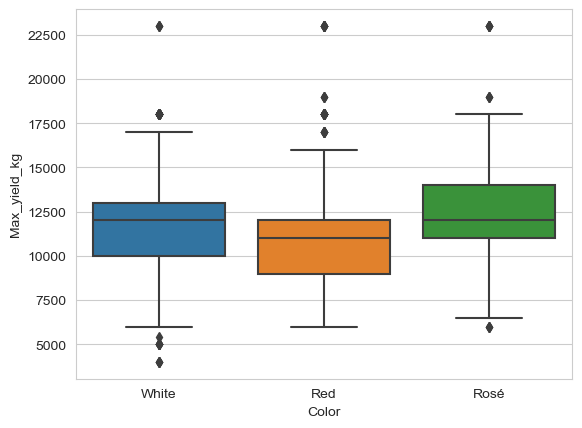

In [356]:
sns.boxplot(data = wine_data, x = 'Color', y = 'Max_yield_kg')

<Axes: xlabel='Color', ylabel='Max_yield_hl'>

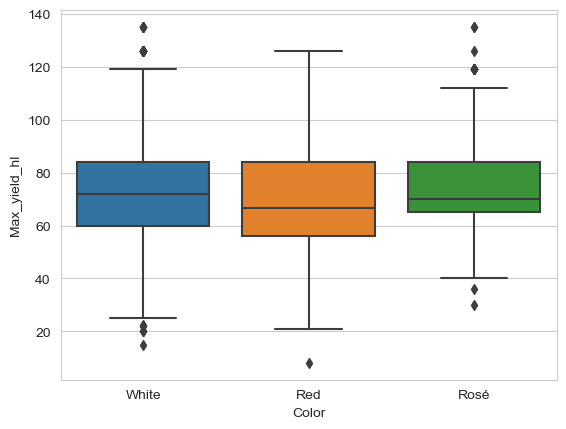

In [357]:
sns.boxplot(data = wine_data, x = 'Color', y = 'Max_yield_hl')

<Axes: xlabel='Color', ylabel='Min_density'>

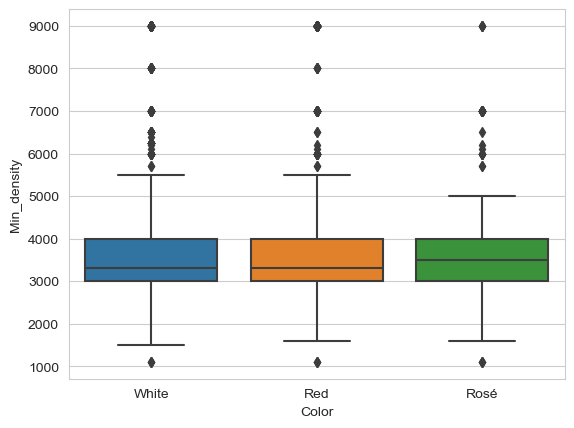

In [358]:
sns.boxplot(data = wine_data, x = 'Color', y = 'Min_density')

#### Finding the correlation between numeric variables

In [359]:
wine_data['Max_yield_hl'].corr(wine_data['Max_yield_kg'])

0.8145703258734522

In [360]:
wine_data['Max_yield_kg'].corr(wine_data['Min_density'])

-0.3621413882629208

#### Checking relationship between yield , year and country

<Axes: xlabel='Max_yield_kg', ylabel='year'>

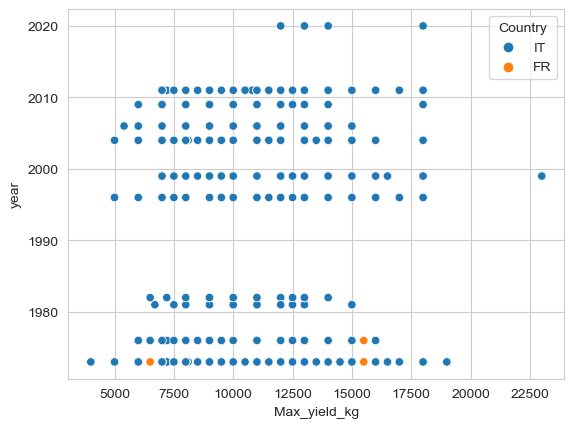

In [361]:
sns.scatterplot(data = wine_data, x = 'Max_yield_kg', y = 'year', hue = 'Country')

### Handling Missing Data
#### Heatmap to visualize Null values

<Axes: >

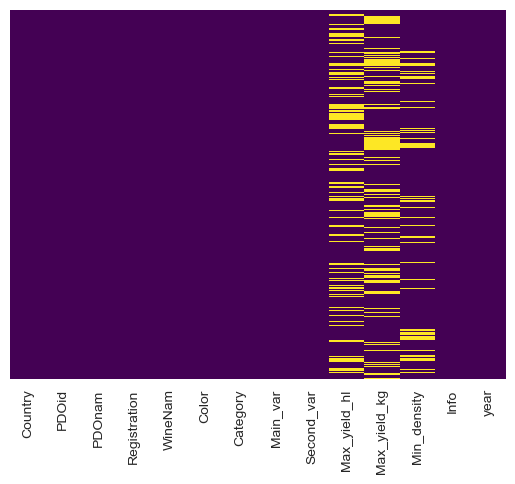

In [362]:
sns.heatmap(wine_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Imputing Null values with mean

In [363]:
wine_data['Max_yield_hl'] = wine_data['Max_yield_hl'].fillna(wine_data['Max_yield_hl'].mean())
wine_data['Max_yield_kg'] = wine_data['Max_yield_kg'].fillna(wine_data['Max_yield_kg'].mean())
wine_data['Min_density'] = wine_data['Min_density'].fillna(wine_data['Min_density'].mean())

#### Confirming null values are replaced

<Axes: >

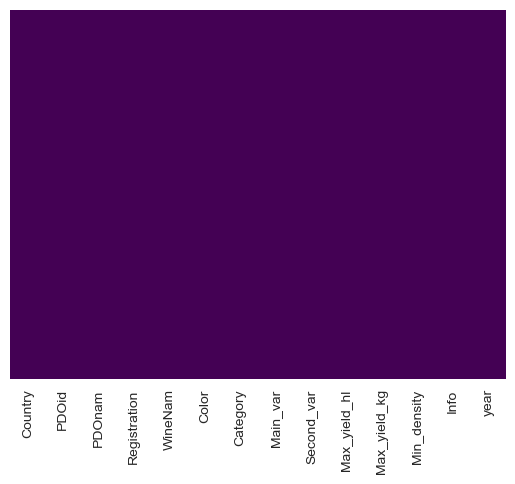

In [364]:
sns.heatmap(wine_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Replacing categorical variables with dummy variables

In [365]:
color = pd.get_dummies(wine_data['Color'], drop_first=True)
category = pd.get_dummies(wine_data['Category'], drop_first=True)
country_int = pd.get_dummies(wine_data['Country'], drop_first=True)
wine_data_final = pd.concat([wine_data, color, category], axis = 1)

In [366]:
wine_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5481 entries, 0 to 5488
Data columns (total 25 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Country                                                        5481 non-null   object 
 1   PDOid                                                          5481 non-null   object 
 2   PDOnam                                                         5481 non-null   object 
 3   Registration                                                   5481 non-null   object 
 4   WineNam                                                        5481 non-null   object 
 5   Color                                                          5481 non-null   object 
 6   Category                                                       5481 non-null   object 
 7   Main_var                                                       54

## Modelling
#### Selecting relevant predictor and target variables

In [367]:
X = wine_data_final.drop(['Country','PDOid', 'PDOnam', 'Registration', 'WineNam', 'Main_var', 'Second_var', 'Info', 'Color', 'Category'], axis = 1)
y = wine_data_final['Country']

#### Splitting data into train and test

In [368]:
from sklearn.model_selection import train_test_split

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Logistic Regression using sklearn
#### Fitting Logistic Regression model to predict country

In [370]:
from sklearn.linear_model import LogisticRegression

In [371]:
logmodel = LogisticRegression()

In [372]:
logmodel.fit(X_train, y_train)

LogisticRegression()

#### Predicting output with test data

In [373]:
predictions = logmodel.predict(X_test)

#### Printing performance metrics

In [374]:
from sklearn.metrics import confusion_matrix, classification_report

In [375]:
confusion_matrix(y_test, predictions)

array([[ 262,   80],
       [  41, 1262]])

In [376]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          FR       0.86      0.77      0.81       342
          IT       0.94      0.97      0.95      1303

    accuracy                           0.93      1645
   macro avg       0.90      0.87      0.88      1645
weighted avg       0.92      0.93      0.92      1645



In [377]:
logmodel.coef_

array([[ 7.93651248e-02, -4.95007667e-04, -3.74408676e-03,
         8.21432179e-03, -7.03206826e-04,  5.83892418e-05,
         4.05053093e-08, -8.52951403e-07, -1.81665827e-05,
        -9.92628182e-05,  3.34916165e-04,  2.89331638e-04,
        -3.83541455e-04,  1.22693666e-04,  2.59246653e-05]])

The performance metrics are pretty good. But to improve it further, I will try to remove features that are not statistically significant.

### Logistic Regression using Statsmodels to find significance of coefficients
#### Fitting Logistic Regression model to predict country

In [378]:
import statsmodels.api as sm

In [379]:
y_sm = (y == 'IT').astype(int)

In [380]:
X_cons = sm.add_constant(X)

model = sm.Logit(y_sm, X_cons.astype(int))

In [381]:
result = model.fit()

         Current function value: 0.161701
         Iterations: 35


/Users/vinayarao/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [382]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Country   No. Observations:                 5481
Model:                          Logit   Df Residuals:                     5465
Method:                           MLE   Df Model:                           15
Date:                Wed, 14 Aug 2024   Pseudo R-squ.:                  0.6897
Time:                        14:54:58   Log-Likelihood:                -886.29
converged:                      False   LL-Null:                       -2856.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                           -55.3029      8.338     -6.633      0.000   

#### Category variable is not statistically significant, it can be omitted from our predictor set. 

In [383]:
wine_data_final = pd.concat([wine_data, color], axis = 1)

In [384]:
X = wine_data_final.drop(['Country','PDOid', 'PDOnam', 'Registration', 'WineNam', 'Main_var', 'Second_var', 'Info', 'Color', 'Category'], axis = 1)
y = wine_data_final['Country']

#### Splitting data into train and test

In [385]:
from sklearn.model_selection import train_test_split

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Retrain the model using sklearn
#### Fitting Logistic Regression model to predict country

In [387]:
from sklearn.linear_model import LogisticRegression

In [388]:
logmodel = LogisticRegression()

In [389]:
logmodel.fit(X_train, y_train)

LogisticRegression()

#### Predicting output with test data

In [390]:
predictions = logmodel.predict(X_test)

#### Printing performance metrics

In [391]:
from sklearn.metrics import confusion_matrix, classification_report

In [392]:
confusion_matrix(y_test, predictions)

array([[ 259,   83],
       [  30, 1273]])

In [393]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          FR       0.90      0.76      0.82       342
          IT       0.94      0.98      0.96      1303

    accuracy                           0.93      1645
   macro avg       0.92      0.87      0.89      1645
weighted avg       0.93      0.93      0.93      1645



#### Omitting the category variable has not improved the performance of the model much. I will now fit the data to a Random Forest model with the goal of achieving better performance.

### Random Forest

In [394]:
from sklearn.ensemble import RandomForestClassifier

In [395]:
rfc = RandomForestClassifier(n_estimators=300)

In [396]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [397]:
rfc_pred = rfc.predict(X_test)

In [398]:
print(confusion_matrix(y_test, rfc_pred))

[[ 340    2]
 [   1 1302]]


In [399]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

          FR       1.00      0.99      1.00       342
          IT       1.00      1.00      1.00      1303

    accuracy                           1.00      1645
   macro avg       1.00      1.00      1.00      1645
weighted avg       1.00      1.00      1.00      1645



#### The Random Forest model is the best of the fitted models with the highest accuracy,  precision and recall.

### Clustering

In [400]:
from sklearn.cluster import KMeans

In [401]:
kmeans = KMeans(n_clusters=2)

In [402]:
kmeans.fit(X)

/Users/vinayarao/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [403]:
kmeans.cluster_centers_

array([[6.36782490e+01, 1.03484155e+04, 4.20352410e+03, 1.98806267e+03,
        8.72007094e-02, 4.44871416e-01],
       [8.35002833e+01, 1.31909736e+04, 3.06343957e+03, 1.99411821e+03,
        1.03908484e-01, 5.34795043e-01]])

In [404]:
kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [405]:
from sklearn.metrics import classification_report, confusion_matrix

In [406]:
confusion_matrix(country_int,kmeans.labels_)

array([[1168,   13],
       [2215, 2085]])

In [407]:
print(classification_report(country_int, kmeans.labels_))

              precision    recall  f1-score   support

       False       0.35      0.99      0.51      1181
        True       0.99      0.48      0.65      4300

    accuracy                           0.59      5481
   macro avg       0.67      0.74      0.58      5481
weighted avg       0.85      0.59      0.62      5481



#### The performance metrics are not very high. I will use the elbow method to find the best value for the number of clusters.

In [408]:
inertia = []

In [409]:
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

/Users/vinayarao/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vinayarao/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vinayarao/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vinayarao/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

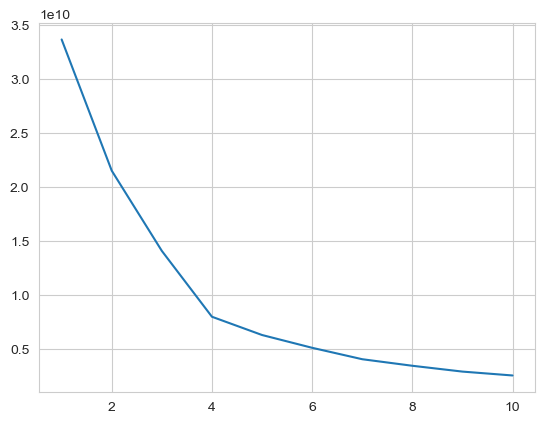

In [410]:
plt.plot(range(1, 11, 1), inertia)

#### The optimum number of clusters is 4. This suggests that the cluster reveals something about the wine types that go beyond the countries.